# Welcome to Covid 19 Analysis Notebook

## Let's import the modules

In [3]:
import  pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Importing Covid 19 Dataset

In [20]:
df=pd.read_csv('C:\\Users\\91730\\Downloads\\country_wise_latest (1).csv')
print(df)


         Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0         

## lets look at the data

In [5]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


## let's  see if there is any missing data

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Country/Region - 0.0%
Confirmed - 0.0%
Deaths - 0.0%
Recovered - 0.0%
Active - 0.0%
New cases - 0.0%
New deaths - 0.0%
New recovered - 0.0%
Deaths / 100 Cases - 0.0%
Recovered / 100 Cases - 0.0%
Deaths / 100 Recovered - 0.0%
Confirmed last week - 0.0%
1 week change - 0.0%
1 week % increase - 0.0%
WHO Region - 0.0%


## Data types for our columns

In [7]:
df.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

## change data type of columns

In [8]:
{col: df[col].unique()for col in df 
if df[col].dtype == object}

{'Country/Region': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
        'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
        'Gr

## create correct Country/Region and WHO Region column

In [9]:
df = df.astype({ "Country/Region" : "category",
                  "WHO Region"  : "category", })

In [10]:
df.dtypes

Country/Region            category
Confirmed                    int64
Deaths                       int64
Recovered                    int64
Active                       int64
New cases                    int64
New deaths                   int64
New recovered                int64
Deaths / 100 Cases         float64
Recovered / 100 Cases      float64
Deaths / 100 Recovered     float64
Confirmed last week          int64
1 week change                int64
1 week % increase          float64
WHO Region                category
dtype: object

In [52]:
df


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


## Describe

In [41]:
df.describe(include=['category'])

,Country/Region,WHO Region
count,187,187
unique,187,6
top,Afghanistan,Europe
freq,1,56


In [43]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


## Missing value check

In [45]:
df.isna().sum()

Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

## Drop columns

In [12]:
df.drop(['WHO Region'],axis=1,inplace=True)

In [13]:
df.drop(['Country/Region'],axis=1,inplace=True)

## Check Correlations

In [14]:
df.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


##  let's change the correlation background

In [15]:
df.corr().style.background_gradient(cmap='PuBu')

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


## Heatmap to visualize correlation between numerical columns

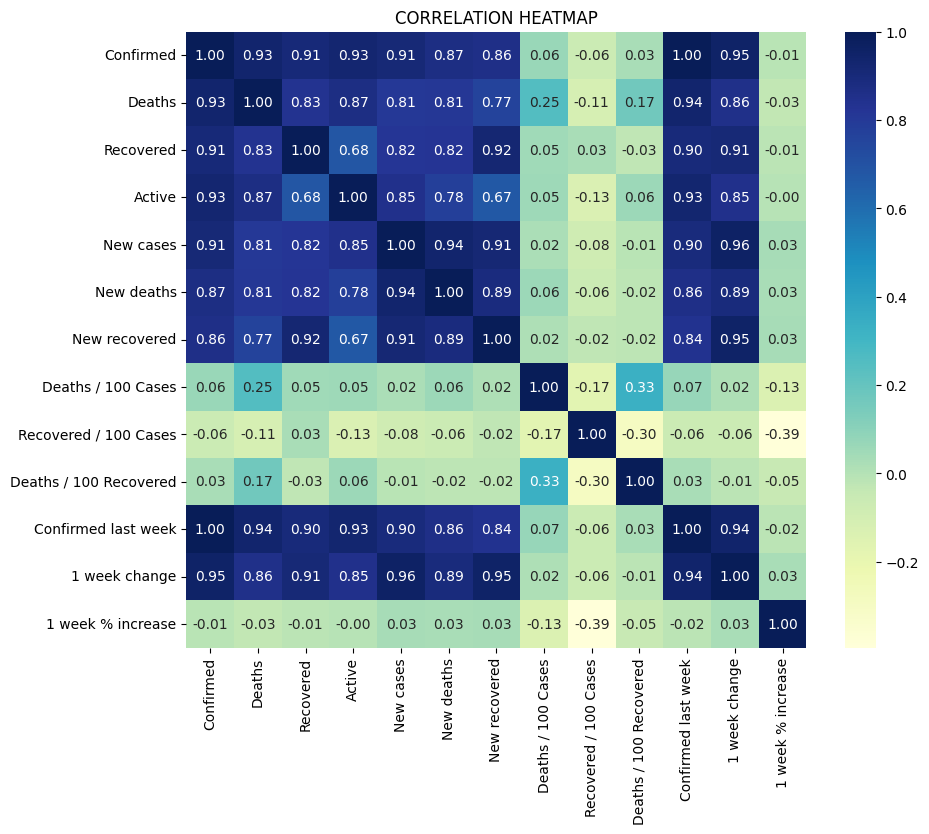

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap = 'YlGnBu',fmt='.2f')
plt.title("CORRELATION HEATMAP")
plt.show()

## New cases

In [16]:
 abs(df.corr())[['New cases']].style.background_gradient(cmap='Blues')

,New cases
Confirmed,0.909720
Deaths,0.806975
Recovered,0.818942
Active,0.851190
New cases,1.000000
New deaths,0.935947
New recovered,0.914765
Deaths / 100 Cases,0.020104
Recovered / 100 Cases,0.078666
Deaths / 100 Recovered,0.011637


## Get maximum 

In [17]:
df.corr().style.highlight_max(axis=0)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


## Get minimum

In [18]:
df.corr().style.highlight_min(axis=0)

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


## Top 10 country having maximum % of recovery

In [21]:
frame1=df[['Country/Region','Recovered']].groupby('Country/Region').mean().round(2).sort_values(by='Recovered',ascending=False).reset_index()[0:10]
frame1

,Country/Region,Recovered
0,Brazil,1846641.0
1,US,1325804.0
2,India,951166.0
3,Russia,602249.0
4,Chile,319954.0
5,Mexico,303810.0
6,South Africa,274925.0
7,Peru,272547.0
8,Iran,255144.0
9,Pakistan,241026.0


## to show which country has maximum percent of Recovery

([<matplotlib.patches.Wedge at 0x22e38e647d0>,
 [Text(0.6773564580777909, 0.8667111564415853, 'Brazil'),
  Text(-0.8585992506569574, 0.6876098652370481, 'US'),
  Text(-0.993522870070772, -0.4721358984935758, 'India'),
  Text(-0.3914514799193329, -1.0279911180885584, 'Russia'),
  Text(0.0981243283007609, -1.0956147206913225, 'Chile'),
  Text(0.4241362331770198, -1.014942587394188, 'Mexico'),
  Text(0.6918602373809538, -0.855178000144514, 'South Africa'),
  Text(0.8942720857766859, -0.6405290286947313, 'Peru'),
  Text(1.0286115072565964, -0.38981837711851525, 'Iran'),
  Text(1.0922938687964725, -0.1299773218282129, 'Pakistan')],
 [Text(0.4926228786020297, 0.630335386502971, '28.88%'),
  Text(-0.6244358186596054, 0.5000799019905804, '20.74%'),
  Text(-0.7225620873241978, -0.3433715625407824, '14.88%'),
  Text(-0.2846919853958784, -0.747629904064406, '9.42%'),
  Text(0.07136314785509883, -0.7968107059573254, '5.00%'),
  Text(0.30846271503783257, -0.7381400635594094, '4.75%'),
  Text(0.5031

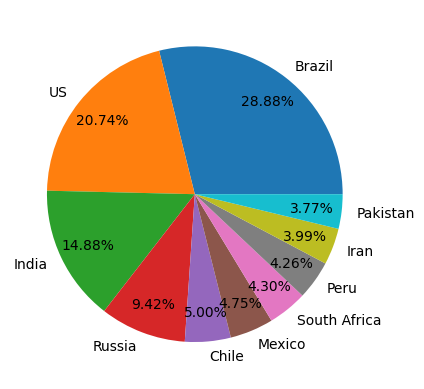

In [55]:
plt.pie(frame1['Recovered'],labels=frame1['Country/Region'],autopct='%0.2f%%',pctdistance=0.8)

### Brazil has maximum percent of Recovery

##  Top 10 country having maximum % of Death

In [66]:
frame1=df[['Country/Region','Deaths']].groupby('Country/Region').mean().round(2).sort_values(by='Deaths',ascending=False).reset_index()[0:10]
frame1

,Country/Region,Deaths
0,US,148011.0
1,Brazil,87618.0
2,United Kingdom,45844.0
3,Mexico,44022.0
4,Italy,35112.0
5,India,33408.0
6,France,30212.0
7,Spain,28432.0
8,Peru,18418.0
9,Iran,15912.0


##  to show which country has maximum count of Death

([<matplotlib.patches.Wedge at 0x22e3b61f6d0>,
 [Text(0.6355249546996674, 0.8978351919778963, 'US'),
  Text(-0.8644464436213818, 0.6802443282456277, 'Brazil'),
  Text(-1.0793097472040816, -0.2123451661570418, 'United Kingdom'),
  Text(-0.7866393287789535, -0.7688943792343639, 'Mexico'),
  Text(-0.31065320033712257, -1.0552225306163168, 'Italy'),
  Text(0.17059919560074138, -1.086690348931277, 'India'),
  Text(0.5900113303206913, -0.9283784950617976, 'France'),
  Text(0.8911924268098854, -0.6448069931357037, 'Spain'),
  Text(1.0427266106221589, -0.3503158796007183, 'Peru'),
  Text(1.0942098116482262, -0.11271596201405412, 'Iran')],
 [Text(0.46219996705430355, 0.6529710487111973, '30.39%'),
  Text(-0.6286883226337322, 0.494723147815002, '17.99%'),
  Text(-0.7849525434211503, -0.1544328481142122, '9.41%'),
  Text(-0.572101330021057, -0.5591959121704465, '9.04%'),
  Text(-0.22592960024518005, -0.7674345677209576, '7.21%'),
  Text(0.12407214225508463, -0.7903202537682014, '6.86%'),
  Text(0

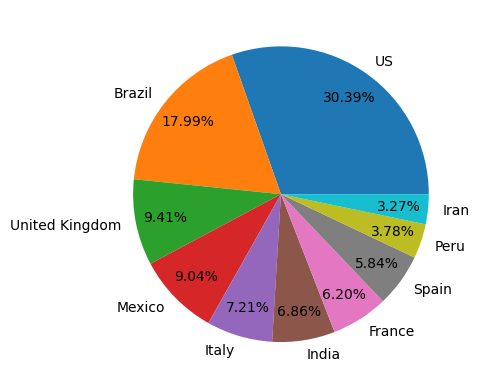

In [68]:
plt.pie(frame1['Deaths'], labels=frame1['Country/Region'],autopct='%0.2f%%',pctdistance=0.8)

### US has maximum count of Death

## Bar plot for WHO Region distribution

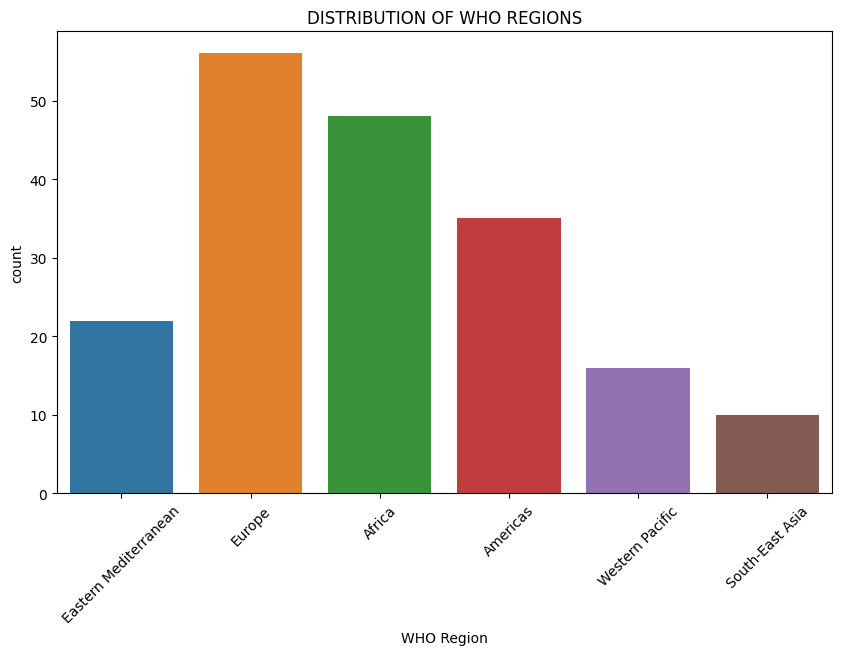

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x='WHO Region',data=df)
plt.title("DISTRIBUTION OF WHO REGIONS")
plt.xticks(rotation=45)
plt.show()